<a href="https://colab.research.google.com/github/wikistat/High-Dimensional-Deep-Learning/blob/master/AutoEncoder/Autoencoders_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 
<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="max-width: 150px; display: inline"  alt="Wikistat"/></a>
<a href="http://www.math.univ-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo_imt.jpg" width=400,  style="float:right;  display: inline" alt="IMT"/> </a>
    
</center>

# Files & Data (Google Colab)

If you're running this notebook on Google colab, you do not have access to the `solutions` folder you get by cloning the repository locally. 

The following lines will allow you to build the folders and the files you need for this TP.

**WARNING 1** Do not run this line localy.
**WARNING 2** The magic command `%load` does not work work on google colab, you will have to copy-paste the solution on the notebook.

In [1]:
! mkdir image
! wget . https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/vae_mlp_decoder.png
! wget . https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/vae_mlp_vae.png
! wget image https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/image/vae_2.svg
! wget image https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/image/vae_3.svg
! mkdir solutions
! wget solutions https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/solutions/compare_sparsity_decoded_imgs.py
! wget solutions https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/solutions/compare_sparsity_encoded_imgs.py
! wget solutions https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/solutions/convolutional_autoencoder.py
! wget solutions https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/solutions/decoded_images_both_method.py
! wget solutions https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/solutions/decoder_vae.py
! wget solutions https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/solutions/generate_single_sample.py
! wget solutions https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/solutions/simple_autoencoder.py
! wget solutions https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/solutions/train_denoise_model.py

mkdir: impossible de créer le répertoire «image»: Le fichier existe
--2022-10-19 08:53:44--  http://./
Résolution de . (.)… échec : Échec temporaire dans la résolution du nom.
wget : impossible de résoudre l’adresse de l’hôte « . »
--2022-10-19 08:53:44--  https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/vae_mlp_decoder.png
Résolution de github.com (github.com)… 140.82.121.4
Connexion à github.com (github.com)|140.82.121.4|:443… connecté.
requête HTTP transmise, en attente de la réponse… 302 Found
Emplacement : https://raw.githubusercontent.com/wikistat/High-Dimensional-Deep-Learning/master/AutoEncoder/vae_mlp_decoder.png [suivant]
--2022-10-19 08:53:44--  https://raw.githubusercontent.com/wikistat/High-Dimensional-Deep-Learning/master/AutoEncoder/vae_mlp_decoder.png
Résolution de raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connexion à raw.githubusercontent.com (raw.githubusercontent.com)

requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 455 [text/plain]
Sauvegarde en : « compare_sparsity_encoded_imgs.py.2 »

compare_sparsity_en 100%[===================>]     455  --.-KB/s    ds 0s      

2022-10-19 08:53:48 (10,2 MB/s) — « compare_sparsity_encoded_imgs.py.2 » sauvegardé [455/455]

Terminé — 2022-10-19 08:53:48 —
Temps total effectif : 0,5s
Téléchargés : 1 fichiers, 455 en 0s (10,2 MB/s)
--2022-10-19 08:53:49--  http://solutions/
Résolution de solutions (solutions)… échec : Échec temporaire dans la résolution du nom.
wget : impossible de résoudre l’adresse de l’hôte « solutions »
--2022-10-19 08:53:49--  https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/solutions/convolutional_autoencoder.py
Résolution de github.com (github.com)… 140.82.121.4
Connexion à github.com (github.com)|140.82.121.4|:443… connecté.
requête HTTP transmise, en attente de la réponse… 302 Found
Emplacement : https://raw.githubusercontent.com/wikistat/H

requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 1293 (1,3K) [text/plain]
Sauvegarde en : « train_denoise_model.py.2 »

train_denoise_model 100%[===================>]   1,26K  --.-KB/s    ds 0s      

2022-10-19 08:53:52 (31,0 MB/s) — « train_denoise_model.py.2 » sauvegardé [1293/1293]

Terminé — 2022-10-19 08:53:52 —
Temps total effectif : 0,5s
Téléchargés : 1 fichiers, 1,3K en 0s (31,0 MB/s)


# High Dimensional & Deep Learning : Autoencoders

##  What is an Autoencoder ?

<P style="text-align:center"><img src="https://blog.keras.io/img/ae/autoencoder_schema.jpg" style="float:center; display: inline" alt="schema"/></P>
<i>Autoencoder architecture</i>

## Objective 

During this TP  we will build different autoencoders with Keras and Tensorflow. Here are the main objectives :

* Build a autoencoder based on simple perceptron layers.
* Add regularization on layers and understand its effects.
* Build a convolutional autoencoder.
* Use a convolutional autoencoder to solve denoising problems.
* Manipulate the library in order to get and observe the result at different points of the dataflow.


The dataset used all along this TP is the MNIST dataset.

## Library

In [3]:
from tensorflow.keras.datasets import mnist
import tensorflow.keras.preprocessing.image as kpi
import tensorflow.keras.models as km
import tensorflow.keras.layers as kl
import tensorflow.keras.regularizers as kr
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf
tensorflow.__version__
import tensorflow

print(tf.test.is_gpu_available())

NameError: name 'tensorflow' is not defined

## Dataset 
As we won't apply any supervised algorithm in this TP, we do not need to load the `Y` variable.

In [4]:
(x_train, _), (x_test, _) = mnist.load_data()

As seen in the previous TP, it is better to normalize the dataset before to apply algorithm on it.

(60000, 28, 28)
(10000, 28, 28)


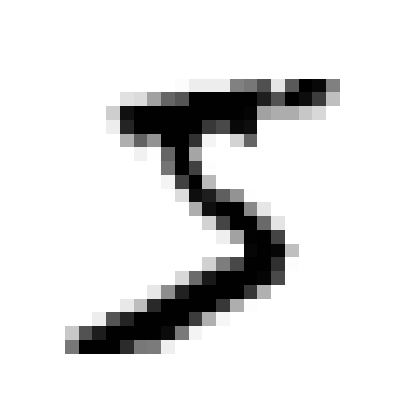

In [5]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print(x_train.shape)
print(x_test.shape)

fig  = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
x = kpi.img_to_array(x_train[0])
ax.imshow(x[:,:,0], interpolation='nearest', cmap="binary")
ax.grid(False)
plt.axis('off')
plt.show()

## Building a simple autoencoder

We will first build a very simple architecture where :

* the **encoder layer** : is a `Dense` layer composed of 32 neurons (the latent variable) with a `Relu` activation function :
$$relu(x) = max(0,x)$$
* the **decoded layer** : is a `Dense` layer composed of  784 neurons (the input dimension) with a `Sigmoid`activation function.
$$sigmoid(x) = \frac{1}{1+\text{e}^x}$$




We first reshape the data form to be 1D.

In [6]:
x_train_flatten = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_flatten = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_train_flatten.shape, x_test_flatten.shape

((60000, 784), (10000, 784))

### Write the model

**Exercice** : write the simple model described above in Keras.

In [7]:
n_latent = 32
n_input = 784

#tentative infructueuse
'''
def simple_autoencoder (n_latent, n_input):
    
    
    
    encoder = kl.Dense(n_latent, activation='relu', name='autoencoder')(n_input)   
    decoder = kl.Dense(n_input, activation='sigmoid', name='decoder')(encoder)    

    output = [encoder, decoder]
    model  = kl.Model(n_latent, output)
    
    return model'''

"\ndef simple_autoencoder (n_latent, n_input):\n    \n    \n    \n    encoder = kl.Dense(n_latent, activation='relu', name='autoencoder')(n_input)   \n    decoder = kl.Dense(n_input, activation='sigmoid', name='decoder')(encoder)    \n\n    output = [encoder, decoder]\n    model  = kl.Model(n_latent, output)\n    \n    return model"

In [8]:
# %load solutions/simple_autoencoder.py
autoencoder = km.Sequential(name = "simple_autoencoder")
autoencoder.add(kl.Dense(n_latent, activation='relu', input_shape=(n_input,),name="encoder_layer"))
autoencoder.add(kl.Dense(n_input, activation='sigmoid', name = "decoder_layer" ))  #couche de sortie sigmoid car sortie entre 0 et 1
autoencoder.summary()

2022-10-19 08:55:29.541509: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-10-19 08:55:29.543554: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-10-19 08:55:29.607628: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:65:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.91GiB deviceMemoryBandwidth: 451.17GiB/s
2022-10-19 08:55:29.607689: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-10-19 08:55:29.614446: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-10-19 08:55:29.614590: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.

Model: "simple_autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_layer (Dense)        (None, 32)                25120     
_________________________________________________________________
decoder_layer (Dense)        (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


We then learn the model. Note that the target variable is the original image.

In [9]:

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_flatten, x_train_flatten, epochs=25, batch_size=256, validation_data=(x_test_flatten, x_test_flatten))

2022-10-19 08:55:30.739467: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-10-19 08:55:30.757509: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3199980000 Hz


Epoch 1/25


2022-10-19 08:55:31.067836: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11


 60/235 [======>.......................] - ETA: 0s - loss: 0.5595

2022-10-19 08:55:31.335808: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11


235/235 [==============================] - 1s 4ms/step - loss: 0.3877 - val_loss: 0.1898
Epoch 2/25
235/235 [==============================] - 1s 3ms/step - loss: 0.1795 - val_loss: 0.1532
Epoch 3/25
235/235 [==============================] - 1s 3ms/step - loss: 0.1490 - val_loss: 0.1333
Epoch 4/25
235/235 [==============================] - 1s 3ms/step - loss: 0.1312 - val_loss: 0.1207
Epoch 5/25
235/235 [==============================] - 1s 3ms/step - loss: 0.1196 - val_loss: 0.1125
Epoch 6/25
235/235 [==============================] - 1s 3ms/step - loss: 0.1125 - val_loss: 0.1072
Epoch 7/25
235/235 [==============================] - 1s 3ms/step - loss: 0.1073 - val_loss: 0.1029
Epoch 8/25
235/235 [==============================] - 1s 3ms/step - loss: 0.1035 - val_loss: 0.1000
Epoch 9/25
235/235 [==============================] - 1s 3ms/step - loss: 0.1005 - val_loss: 0.0975
Epoch 10/25
235/235 [==============================] - 1s 3ms/step - loss: 0.0982 - val_loss: 0.0958
Epoch 11/2

**Question** : We use the binary cross entropy here as in the original paper [1](https://arxiv.org/pdf/1312.6114.pdf). Does it seem an intuitive choice? Why?
How is the loss evolving during training?

Binary-corossentropy : binaire pixel blanc ou noir (pas hyper vrai avec mnist

### Check outputs

We will no check how the model performs. We produce first the encoded-decoded images.

In [10]:
decoded_test_imgs = autoencoder.predict(x_test_flatten)

The following function displays both the input and the output of the autoencoder model.

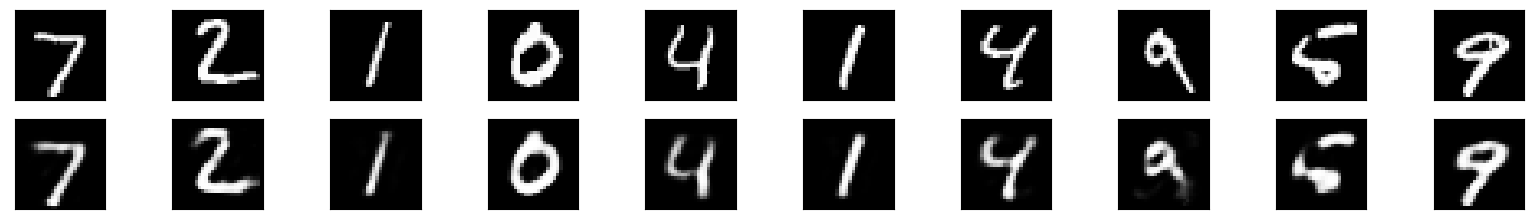

In [11]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_test_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Question** : What can you say about this results?

c'est pas mal !




### Check latent variable

The Keras model that we have written above does not allow us to retrieve the latent variables. 
In order to do so, we have to re-write the model in order to get this variable later.

We first write the encoder part.

In [12]:
encoder = km.Sequential(name="EncoderModel")
encoder.add(kl.Dense(n_latent, activation='relu', input_shape=(n_input,),name="encoder_layer"))

We then write the decoder as  another independent model

In [13]:
decoder = km.Sequential(name="DecoderModel")
decoder.add(kl.Dense(n_input, activation='sigmoid', input_shape =(n_latent,), name = "decoded_layer" ))

We finally write the autoencoder model by adding the two previous models

In [14]:
autoencoder = km.Sequential(name="EncoderDecoder")
autoencoder.add(encoder)
autoencoder.add(decoder)

The model is well composed of the association of the two previous models.

In [15]:
autoencoder.summary()

Model: "EncoderDecoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
EncoderModel (Sequential)    (None, 32)                25120     
_________________________________________________________________
DecoderModel (Sequential)    (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


You can access the two sub models with the following syntax

In [16]:
autoencoder.get_layer("EncoderModel").summary()

Model: "EncoderModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_layer (Dense)        (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


The model can then be learned by the same way.

In [17]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_flatten, x_train_flatten, epochs=25, batch_size=256, validation_data=(x_test_flatten, x_test_flatten))

Epoch 1/25
235/235 [==============================] - 1s 4ms/step - loss: 0.3806 - val_loss: 0.1920
Epoch 2/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1821 - val_loss: 0.1552
Epoch 3/25
235/235 [==============================] - 1s 3ms/step - loss: 0.1505 - val_loss: 0.1346
Epoch 4/25
235/235 [==============================] - 1s 3ms/step - loss: 0.1323 - val_loss: 0.1218
Epoch 5/25
235/235 [==============================] - 1s 3ms/step - loss: 0.1207 - val_loss: 0.1134
Epoch 6/25
235/235 [==============================] - 1s 3ms/step - loss: 0.1130 - val_loss: 0.1074
Epoch 7/25
235/235 [==============================] - 1s 3ms/step - loss: 0.1073 - val_loss: 0.1031
Epoch 8/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1034 - val_loss: 0.0997
Epoch 9/25
235/235 [==============================] - 1s 3ms/step - loss: 0.1003 - val_loss: 0.0973
Epoch 10/25
235/235 [==============================] - 1s 3ms/step - loss: 0.0981 - val_loss: 0.0957

**Question** What can you say about the loss value of the model ? 

c'est les mêmes


We can now access and produce easily the latent variables.

In [18]:
encoded_imgs = encoder.predict(x_test_flatten)
encoded_imgs.shape

(10000, 32)

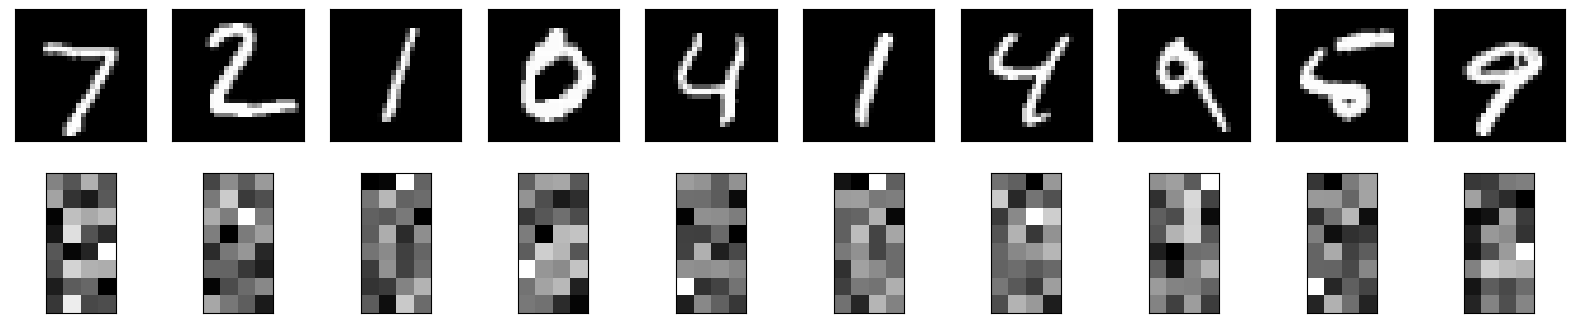

In [19]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded imgs
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

You can produce the decoded images by :
* Using the decoded part on the encoded images.
* Using the whole architecture on the original image.

**Exercise** : Check that both methods produce the same results.

Are all pair of decoded images from both methods equal : True 


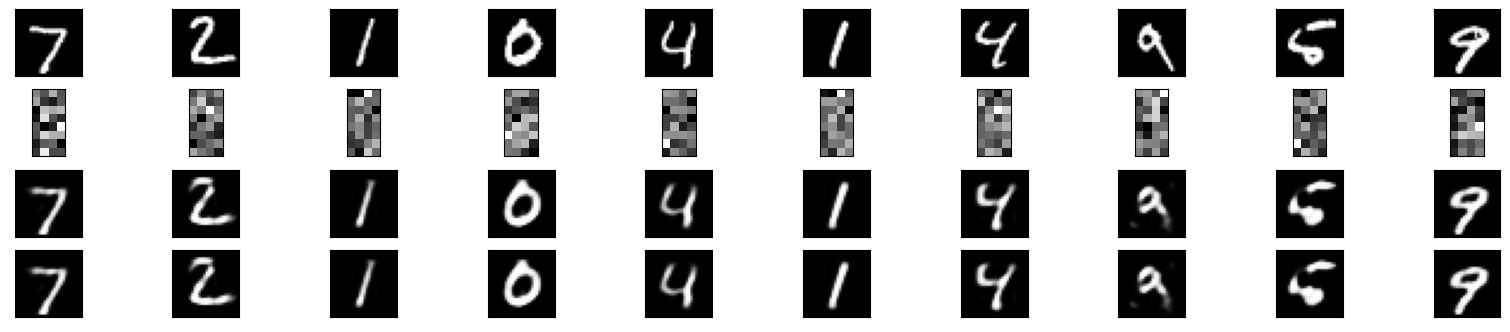

In [20]:
# %load solutions/decoded_images_both_method.py
decoded_imgs_1 = decoder.predict(encoded_imgs)
decoded_imgs_2 = autoencoder.predict(x_test_flatten)
print("Are all pair of decoded images from both methods equal : %s " %np.all(decoded_imgs_1==decoded_imgs_2))

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded imgs
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded imgs
    ax = plt.subplot(4, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs_1[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded imgs
    ax = plt.subplot(4, n, i + 1 + 3*n)
    plt.imshow(decoded_imgs_2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

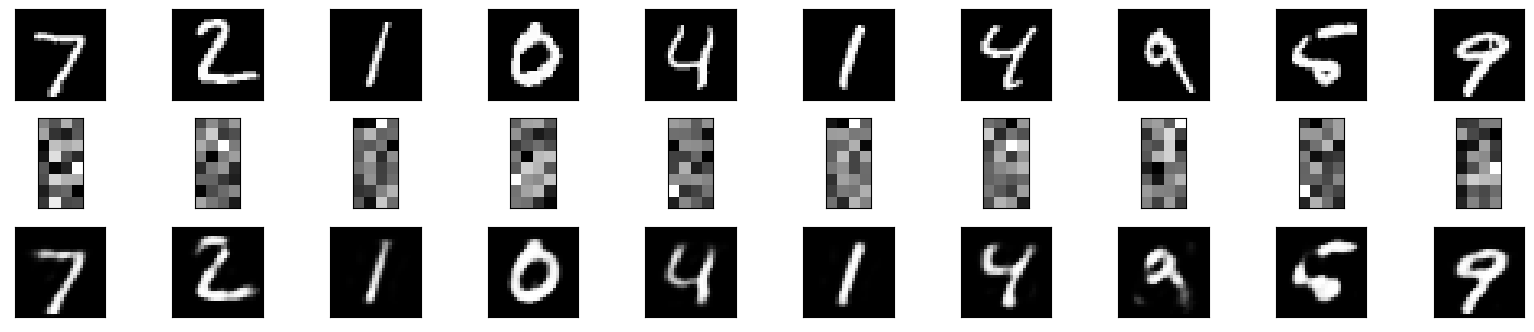

In [21]:
## Ma version

decoded_imgs = decoder.predict(encoded_imgs )
decoded_imgs.shape

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded imgs
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #display decodeed imgs
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Sparse autoencoder

In the previous example the autoencoder is only constrained by the size of the hidden layer. 

In the following figure you can see the distribution of the number of latent variables set to zero for the 10.000 test images.

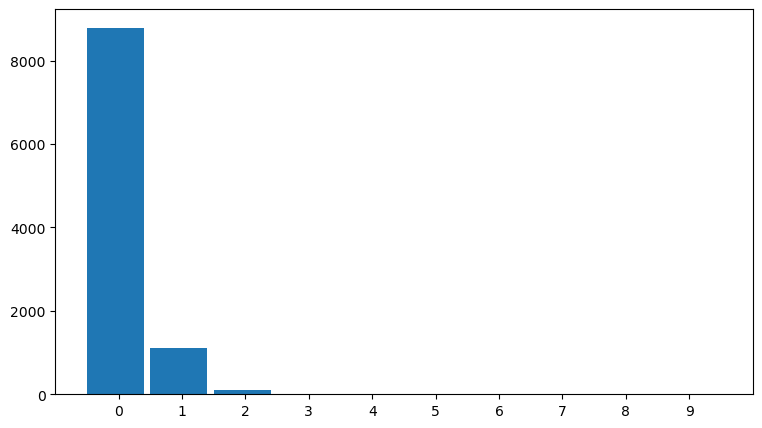

In [22]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(1,1,1)
ax.hist(np.sum(encoded_imgs==0,axis=1), width=0.9, bins=np.arange(-0.5,10.5,1))
ax.set_xticks(np.arange(10))
plt.show()

Another way to get a sparser encoded representation of the images is to add a *sparsity constraint* on the activity function of the hidden layer. 

Regularizers enable to avoid overfitting by adding some constraint on the weights we want to control. 

Cost function = Loss (say, binary cross-entropy) + Regularization term 

Cost function = Loss + $\lambda$ $\sum w$, where in our case $\lambda = 10e-5$ and $w$ are the weights of the encoder model.

In [23]:
l = 10e-5

sparse_encoder = km.Sequential(name="SparseEncoderModel")
sparse_encoder.add(kl.Dense(n_latent, activation='relu', input_shape=(n_input,), activity_regularizer=kr.l1(l) ,name="encoder_layer"))

sparse_decoder = km.Sequential(name="SparseDecoderModel")
sparse_decoder.add(kl.Dense(n_input, activation='sigmoid', input_shape =(n_latent,), name = "decoded_layer" ))

sparse_autoencoder = km.Sequential(name="SparseEncoderDecoder")
sparse_autoencoder.add(sparse_encoder)
sparse_autoencoder.add(sparse_decoder)


We can now train the model as previously.

In [24]:
sparse_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
sparse_autoencoder.fit(x_train_flatten, x_train_flatten, epochs=25, batch_size=256,validation_data=(x_test_flatten, x_test_flatten))

Epoch 1/25
235/235 [==============================] - 1s 4ms/step - loss: 0.3910 - val_loss: 0.1909
Epoch 2/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1826 - val_loss: 0.1599
Epoch 3/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1566 - val_loss: 0.1424
Epoch 4/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1407 - val_loss: 0.1308
Epoch 5/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1299 - val_loss: 0.1227
Epoch 6/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1224 - val_loss: 0.1170
Epoch 7/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1173 - val_loss: 0.1130
Epoch 8/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1135 - val_loss: 0.1102
Epoch 9/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1109 - val_loss: 0.1082
Epoch 10/25
235/235 [==============================] - 1s 3ms/step - loss: 0.1092 - val_loss: 0.1069

**Question** : What can you say on the loss function compared with the previous model?

**Exercise**  : Check that the encoded images obtained with the sparse autoencoder are indeed sparser than the ones obtained by the first autoencoder. 

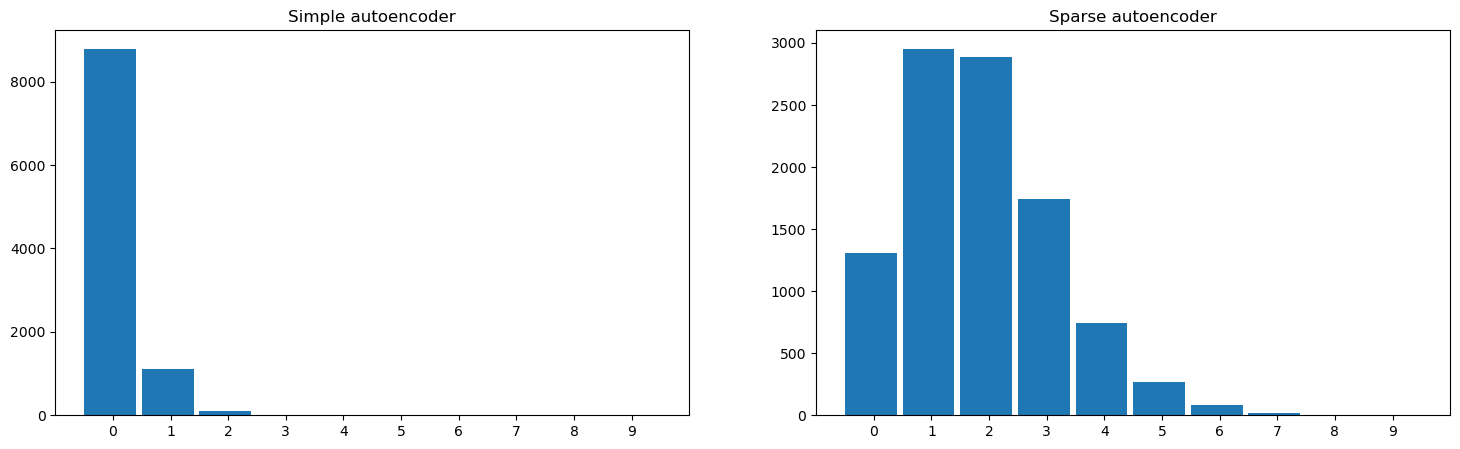

In [25]:
# %load solutions/compare_sparsity_encoded_imgs.py
sparse_encoded_imgs = sparse_encoder.predict(x_test_flatten)
fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot(1,2,1)
ax.hist(np.sum(encoded_imgs==0,axis=1), width=0.9, bins=np.arange(-0.5,10.5,1))
ax.set_xticks(np.arange(10))
ax.set_title("Simple autoencoder")
ax = fig.add_subplot(1,2,2)
ax.hist(np.sum(sparse_encoded_imgs==0,axis=1), width=0.9, bins=np.arange(-0.5,10.5,1))
ax.set_xticks(np.arange(10))
ax.set_title("Sparse autoencoder")
plt.show()

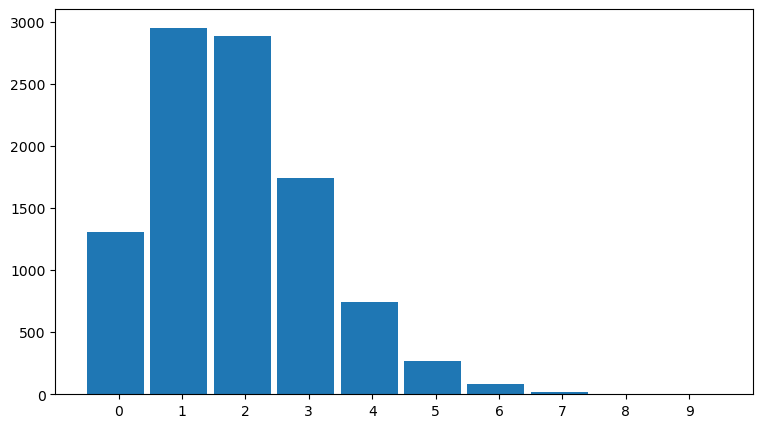

In [26]:
sp_encoded_imgs = sparse_encoder.predict(x_test_flatten)
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(1,1,1)
ax.hist(np.sum(sp_encoded_imgs==0,axis=1), width=0.9, bins=np.arange(-0.5,10.5,1))
ax.set_xticks(np.arange(10))
plt.show()

**Exercise** : Compare the decoded images obtained by the first and the sparse model.

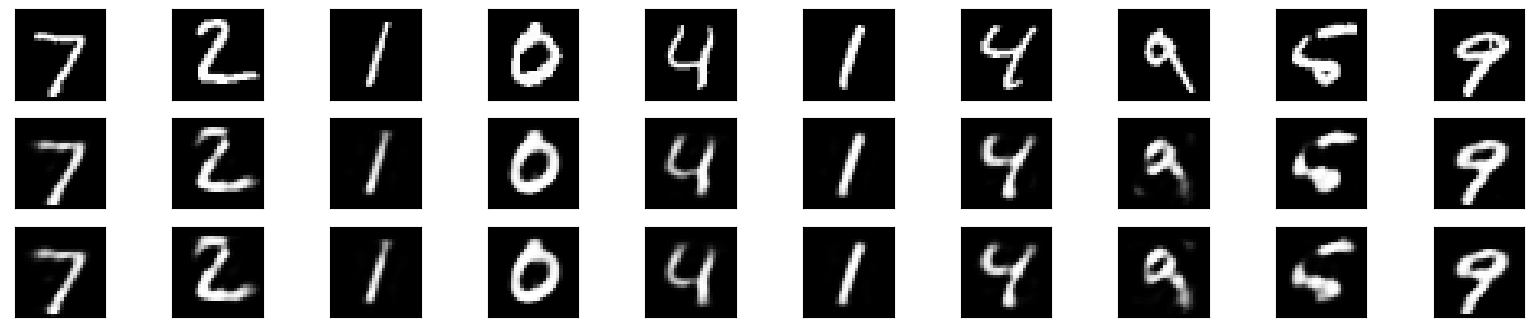

In [32]:
# %load solutions/compare_sparsity_decoded_imgs.py
sparse_decoded_imgs = sparse_decoder.predict(sparse_encoded_imgs)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display simple reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs_1[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display sparse reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(sparse_decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Convolutional Autoencoder

In the previous part, we have seen very simple autoencoders where both encoder and decoder parts are composed of a single layer. They both can be composed of more layers (deep autoencoder) and with differents types of layers.

As seen in the previous TP, convolutional layers are the best layers to use when dealing with images. 

**Exercise** : Implement a convolutional Autoencoder with the following architecture: 

`Encoder`
* A 2d convolutional layer, 16 filters of size 3x3
* A 2Dmaxpooling layer with filters of size 2x2
* A 2d convolutial layer, 8 filters of size 3x3
* A 2Dmaxpooling layer with filters of size 2x2
* A 2d convolutial layer, 8 filters of size 3x3
* A 2Dmaxpooling layer with filters of size 2x2

`Decoder`
* A 2d convolutional layer, 8 filters of size 3x3
* A 2Dupsampling layer with filters of size 2x2
* A 2d convolutional layer, 8 filters of size 3x3
* A 2Dupsampling layer with filters of size 2x2
* A 2d convolutional layer, 16 filters of size 3x3
* A 2Dupsampling layer with filters of size 2x2
* A 2d convolutional layer, 1 filters of size 3x3, with SIGMOID activation


*All padding are `SAME` padding and all convolutional activation function but last are `RELU`*



In [64]:
# %load solutions/convolutional_autoencoder.py
x_train_conv = np.expand_dims(x_train, axis=-1)
x_test_conv = np.expand_dims(x_test, axis=-1)


conv_encoder = km.Sequential(name="ConvEncoderModel")
conv_encoder.add(kl.Conv2D(16, (3,3) , activation='relu', input_shape=(28,28,1) , padding='same' ))
conv_encoder.add(kl.MaxPooling2D((2, 2), padding='same'))
conv_encoder.add(kl.Conv2D(8, (3, 3), activation='relu', padding='same'))
conv_encoder.add(kl.MaxPooling2D((2, 2), padding='same'))
conv_encoder.add(kl.Conv2D(8, (3, 3), activation='relu', padding='same'))
conv_encoder.add(kl. MaxPooling2D((2, 2), padding='same'))

conv_decoder = km.Sequential(name="ConvDecoderModel")
conv_decoder.add(kl.Conv2D(8, (3, 3), activation='relu', input_shape = (4, 4, 8), padding='same'))
conv_decoder.add(kl.UpSampling2D((2, 2)))
conv_decoder.add(kl.Conv2D(8, (3, 3), activation='relu', padding='same'))
conv_decoder.add(kl.UpSampling2D((2, 2)))
conv_decoder.add(kl.Conv2D(16, (3, 3), activation='relu'))
conv_decoder.add(kl.UpSampling2D((2, 2)))
conv_decoder.add(kl.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))


In [79]:
conv_encoder = km.Sequential(name="conv_encoder")
conv_encoder.add(kl.Conv2D(16, 3, activation = 'relu', input_shape=(28,28,1), padding = 'same'))
conv_encoder.add(kl.MaxPooling2D(pool_size=(2, 2), padding="same"))
conv_encoder.add(kl.Conv2D(8, 3, activation = 'relu', padding = 'same'))
conv_encoder.add(kl.MaxPooling2D(pool_size=(2, 2), padding="same"))
conv_encoder.add(kl.Conv2D(8, 3, activation = 'relu', padding = 'same'))
conv_encoder.add(kl.MaxPooling2D(pool_size=(2, 2), padding="same"))

conv_encoder.summary()

Model: "conv_encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 4, 4, 8)           0         
Total params: 1,904
Trainable params: 1,904
Non-trainable params: 0
____________________________________________________

In [80]:
conv_decoder = km.Sequential(name="conv_decoder")
conv_decoder.add(kl.Conv2D(8, 3, activation = 'relu', input_shape = (4, 4, 8), padding = 'same', kernel_initializer = 'he_normal', name="conv4"))
conv_decoder.add(kl.UpSampling2D(size=(2, 2)))
conv_decoder.add(kl.Conv2D(8, 3, activation = 'relu', padding = 'same'))
conv_decoder.add(kl.UpSampling2D(size=(2, 2)))
conv_decoder.add(kl.Conv2D(16, 3, activation = 'relu')) #ici pas de padding sinon 32*32 au lieu de 28*28
conv_decoder.add(kl.UpSampling2D(size=(2, 2)))
conv_decoder.add(kl.Conv2D(1, 3, activation = 'sigmoid', padding = 'same'))

conv_decoder.summary()

Model: "conv_decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv4 (Conv2D)               (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d_27 (UpSampling (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 8)           584       
_________________________________________________________________
up_sampling2d_28 (UpSampling (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 16)        1168      
_________________________________________________________________
up_sampling2d_29 (UpSampling (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 1)        

In [75]:
conv_autoencoder = km.Sequential(name="ConvAutoencoderModel")
conv_autoencoder.add(conv_encoder)
conv_autoencoder.add(conv_decoder)
conv_autoencoder.summary()

Model: "ConvAutoencoderModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_encoder (Sequential)    (None, 4, 4, 8)           1904      
_________________________________________________________________
conv_decoder (Sequential)    (None, 28, 28, 1)         2481      
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [76]:
x_train_conv = np.expand_dims(x_train, axis=-1)
x_test_conv = np.expand_dims(x_test, axis=-1)


In [77]:
conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
conv_autoencoder.fit(x_train_conv, x_train_conv, epochs=10, batch_size=256, validation_data=(x_test_conv, x_test_conv))

Epoch 1/10
235/235 [==============================] - 3s 10ms/step - loss: 0.4012 - val_loss: 0.1737
Epoch 2/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1666 - val_loss: 0.1478
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1447 - val_loss: 0.1317
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1304 - val_loss: 0.1239
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1236 - val_loss: 0.1187
Epoch 6/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1189 - val_loss: 0.1151
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1157 - val_loss: 0.1122
Epoch 8/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1128 - val_loss: 0.1102
Epoch 9/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1107 - val_loss: 0.1086
Epoch 10/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1091 - val_lo

In [78]:
conv_autoencoder.evaluate(x_train_conv, x_train_conv)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.1080


0.10798308253288269

**Question** What can you say about the loss function?

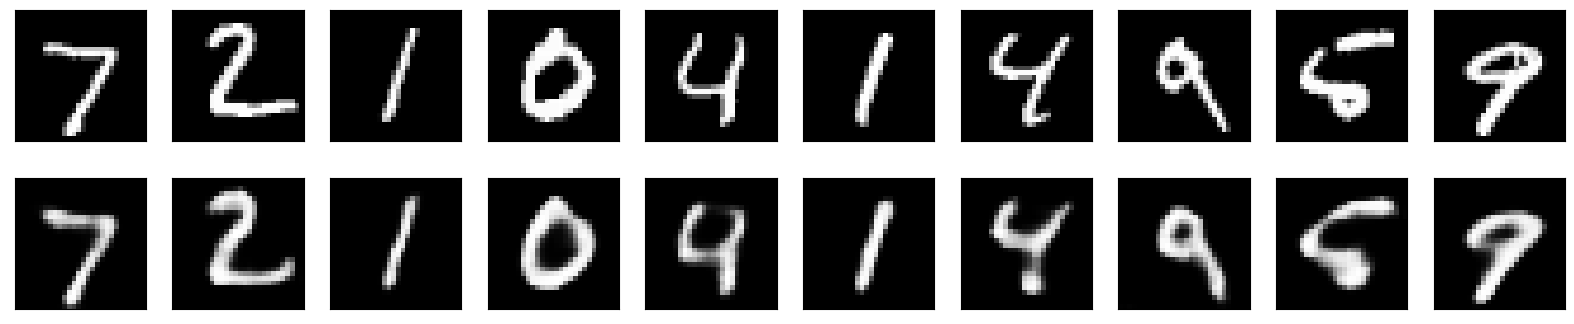

In [81]:
encoded_imgs = conv_encoder.predict(x_test_conv)
decoded_imgs = conv_autoencoder.predict(x_test_conv)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


### Application to denoising

We now know how to build a convolutional autoencoder. 

We will now see how it can be used to solve a denoising problem. 

We first create fake noisy data.

In [82]:
# Add random noise
noise_factor = 0.5
x_train_noisy = x_train_conv + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_conv.shape) 
x_test_noisy = x_test_conv + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_conv.shape) 

# Value greater than 1 are set to 1 and value lower than 0 are set to zero
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

Let's observe the noise we created.

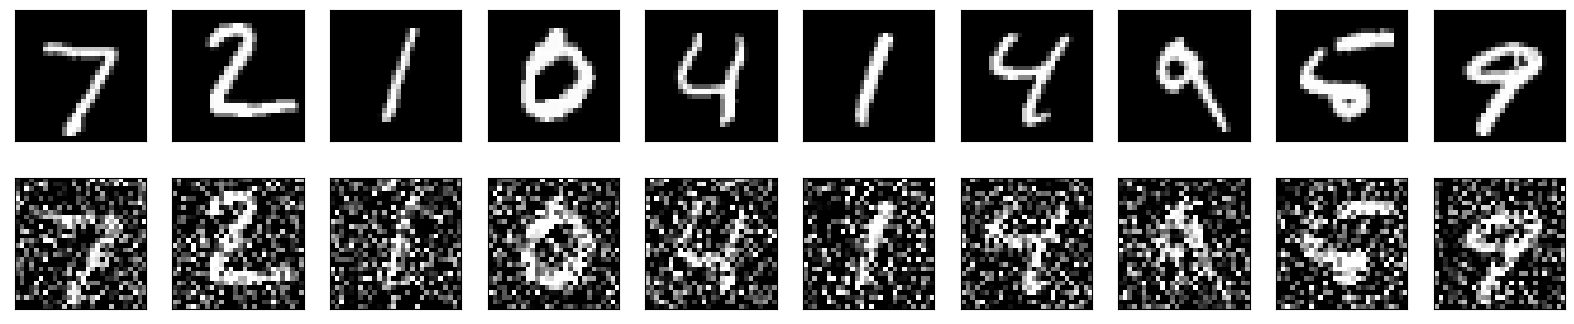

In [83]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # noisy data
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Exercise** : Now let's train the same convolutional model that we built above. But let's train this model with noisy data as an input and the original data as the output.

In [88]:
# %load solutions/train_denoise_model.py
conv_encoder = km.Sequential(name="ConvEncoderModel")
conv_encoder.add(kl.Conv2D(16, (3,3) , activation='relu', input_shape=(28,28,1) , padding='same' ))
conv_encoder.add(kl.MaxPooling2D((2, 2), padding='same'))
conv_encoder.add(kl.Conv2D(8, (3, 3), activation='relu', padding='same'))
conv_encoder.add(kl.MaxPooling2D((2, 2), padding='same'))
conv_encoder.add(kl.Conv2D(8, (3, 3), activation='relu', padding='same'))
conv_encoder.add(kl. MaxPooling2D((2, 2), padding='same'))

conv_decoder = km.Sequential(name="ConvDecoderModel")
conv_decoder.add(kl.Conv2D(8, (3, 3), activation='relu', input_shape = (4, 4, 8), padding='same'))
conv_decoder.add(kl.UpSampling2D((2, 2)))
conv_decoder.add(kl.Conv2D(8, (3, 3), activation='relu', padding='same'))
conv_decoder.add(kl.UpSampling2D((2, 2)))
conv_decoder.add(kl.Conv2D(16, (3, 3), activation='relu'))
conv_decoder.add(kl.UpSampling2D((2, 2)))
conv_decoder.add(kl.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

conv_autoencoder = km.Sequential(name="ConvAutoencoderModel")
conv_autoencoder.add(conv_encoder)
conv_autoencoder.add(conv_decoder)

conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
conv_autoencoder.fit(x_train_noisy, x_train_conv, epochs=10, batch_size=256, validation_data=(x_test_noisy, x_test_conv))

Epoch 1/10
235/235 [==============================] - 3s 11ms/step - loss: 0.3996 - val_loss: 0.2081
Epoch 2/10
235/235 [==============================] - 2s 10ms/step - loss: 0.2003 - val_loss: 0.1845
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1833 - val_loss: 0.1751
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1742 - val_loss: 0.1677
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1665 - val_loss: 0.1603
Epoch 6/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1607 - val_loss: 0.1557
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1554 - val_loss: 0.1517
Epoch 8/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1514 - val_loss: 0.1481
Epoch 9/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1485 - val_loss: 0.1452
Epoch 10/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1456 - val_lo

In [91]:
conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

conv_autoencoder.fit(x_train_noisy, x_train_conv, epochs=10, batch_size=256, validation_data=(x_test_noisy, x_test_conv))

Epoch 1/10
235/235 [==============================] - 3s 10ms/step - loss: 0.1488 - val_loss: 0.1416
Epoch 2/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1425 - val_loss: 0.1404
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1410 - val_loss: 0.1399
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1401 - val_loss: 0.1374
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1384 - val_loss: 0.1376
Epoch 6/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1376 - val_loss: 0.1351
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1362 - val_loss: 0.1346
Epoch 8/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1354 - val_loss: 0.1341
Epoch 9/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1349 - val_loss: 0.1332
Epoch 10/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1338 - val_lo

Now, we pass the noisy test data into the trained autoencorder in order to denoise this data.

In [92]:
x_test_denoised = conv_autoencoder.predict(x_test_noisy)

Here are the results of the denoised data.

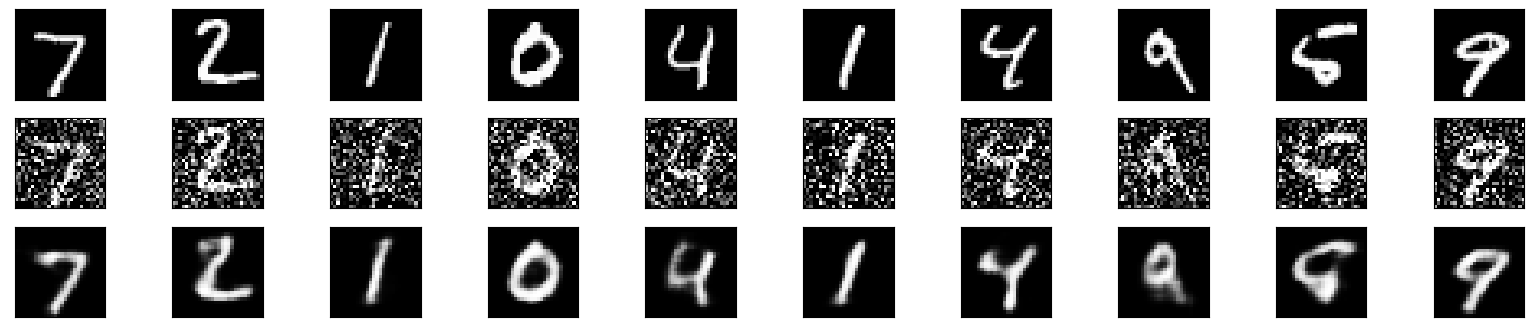

In [93]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # noisy data
    ax = plt.subplot(3, n, i + n+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # denoised data
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test_denoised[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Exercise** : Play with different architectures to decrease loss function